Explained variance by each principal component: [0.44272026 0.18971182]


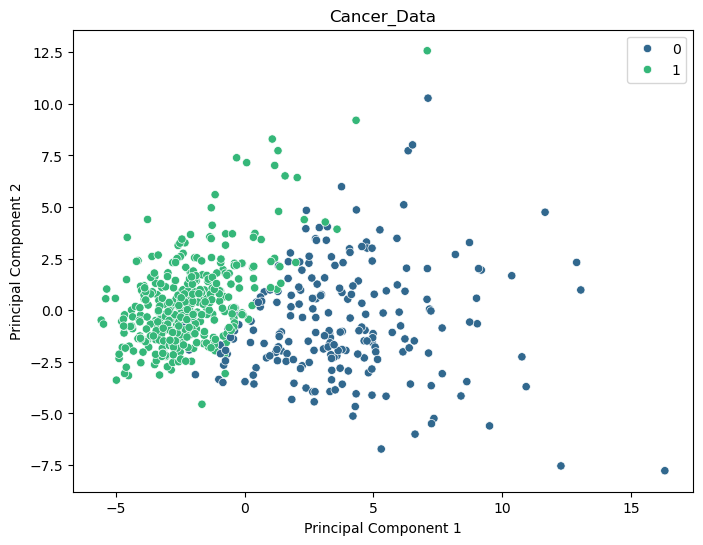

                              PC1       PC2
mean radius              0.798469 -0.558394
mean texture             0.378346 -0.142564
mean perimeter           0.829965 -0.513800
mean area                0.806101 -0.551755
mean smoothness          0.520110  0.444392
mean compactness         0.872817  0.362680
mean concavity           0.942542  0.143660
mean concave points      0.951490 -0.083016
mean symmetry            0.503978  0.454506
mean fractal dimension   0.234772  0.875292
radius error             0.751328 -0.252033
texture error            0.063570  0.214849
perimeter error          0.770833 -0.213602
area error               0.739987 -0.363638
smoothness error         0.053005  0.488130
compactness error        0.621527  0.555669
concavity error          0.560234  0.470883
concave points error     0.669033  0.311176
symmetry error           0.155017  0.438984
fractal dimension error  0.374128  0.668791
worst radius             0.831641 -0.524987
worst texture            0.38106

In [2]:
### Performing Principal Component Analysis on Cancer Data
#Import Necessary Libraries

import pandas as pd # pandas for data manipulation
import numpy as np #numpy for numerical operations
from sklearn.preprocessing import StandardScaler # to scale the data
from sklearn.decomposition import PCA # to perform PCA
import seaborn as sns # for chart
import matplotlib.pyplot as plt # for chart


# Load the cancer dataset from sklearn
from sklearn.datasets import load_breast_cancer
cancer_data = load_breast_cancer()
features = cancer_data.data
label = cancer_data.target


# Standardize the features 
# PCA is sensitive to the scale of the data so standardizing isvery important
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Fit the PCA model to the features data and transform it to get 2 principal components.
pca = PCA(n_components=2)  # Reduce to 2 principal components
pca_features = pca.fit_transform(scaled_features)

# Explained variance to give the amount of variance explained by each of the principal components.
explained_variance = pca.explained_variance_ratio_
print(f'Explained variance by each principal component: {explained_variance}')

# Plot the principal components
# Draw a scatter plot to show the data in terms of the two principal components.
plt.figure(figsize=(8, 6))
sns.scatterplot(x=pca_features[:, 0], y=pca_features[:, 1], hue=label, palette='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Cancer_Data')
plt.show()


# Contribution of original variables to principal components to show how much each original variable contributed to the principal components.
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)
loadings_df = pd.DataFrame(loadings, columns=['PC1', 'PC2'], index=cancer_data.feature_names)
print(loadings_df)


Accuracy: 0.99
Confusion Matrix:
[[42  1]
 [ 0 71]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        43
           1       0.99      1.00      0.99        71

    accuracy                           0.99       114
   macro avg       0.99      0.99      0.99       114
weighted avg       0.99      0.99      0.99       114



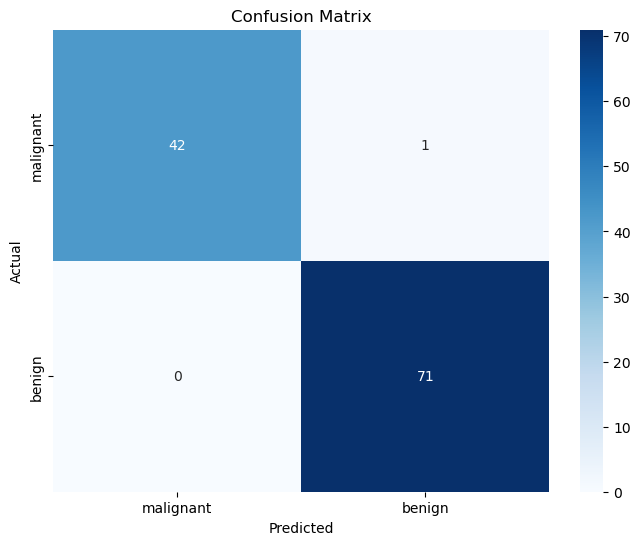

In [4]:
#Implementing Logistics regression for prediction

#Import the necessary Libraries
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Split the dataset into training and testing sets
features_train, features_test, label_train, label_test = train_test_split(pca_features, label, test_size=0.2, random_state=42)
#Implementing Logistics regression for prediction

# Fit the logistic regression model
log_reg = LogisticRegression()
log_reg.fit(features_train, label_train)

# Make predictions
label_pred = log_reg.predict(features_test)

# Evaluate the model
accuracy = accuracy_score(label_test, label_pred)
conf_matrix = confusion_matrix(label_test, label_pred)
class_report = classification_report(label_test, label_pred)

print(f'Accuracy: {accuracy:.2f}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=cancer_data.target_names, yticklabels=cancer_data.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()